### **Deep Learning**

**ATENÇÃO**: O TensorFlow pode apresentar problemas em algumas versões de sistema operacional. Verifique a documentação oficial no link acima.

In [ ]:
# Instala o TF
!pip install -q tensorflow==2.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 32.2 MB/s eta 0:00:00


In [ ]:
# Silencia mensagens do TF
%env TF_CPP_MIN_LOG_LEVEL=3

env: TF_CPP_MIN_LOG_LEVEL=3


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

### **Carregando os Dados**

https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
# Carrega o dataset CIFAR-10
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
# Clases das imagens
nomes_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### **Pré-Processamento e Visualização das Imagens**

In [ ]:
# Normaliza os valores dos pixels para que os dados fiquem na mesma escala
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0

In [ ]:
# Função para exibir as imagens
def visualiza_imagens(images, labels):
    plt.figure(figsize = (10,10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
        plt.xlabel(nomes_classes[labels[i][0]])
    plt.show()

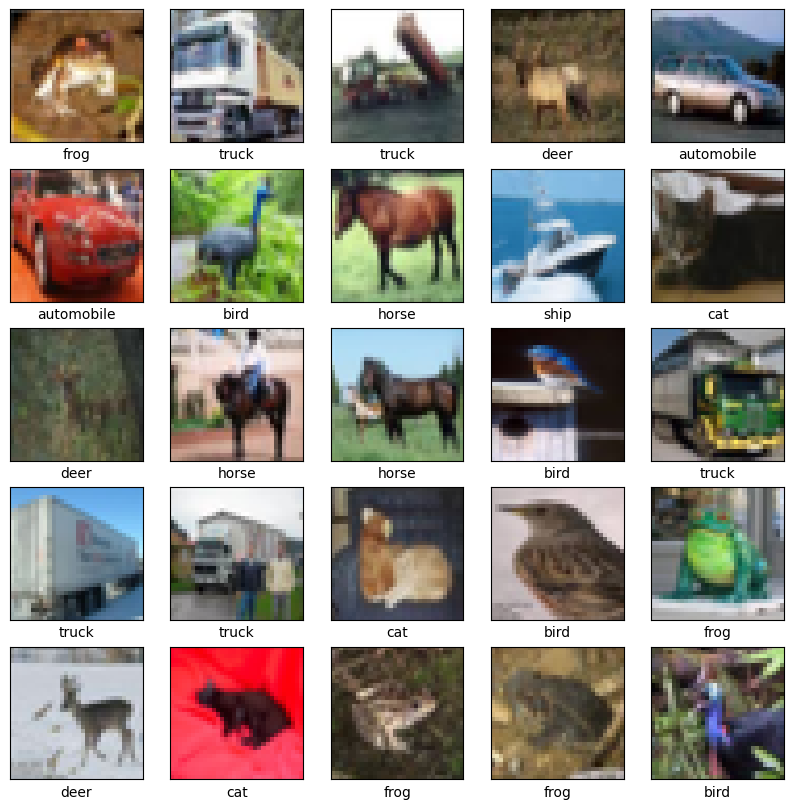

In [ ]:
# Executa a função
visualiza_imagens(imagens_treino, labels_treino)

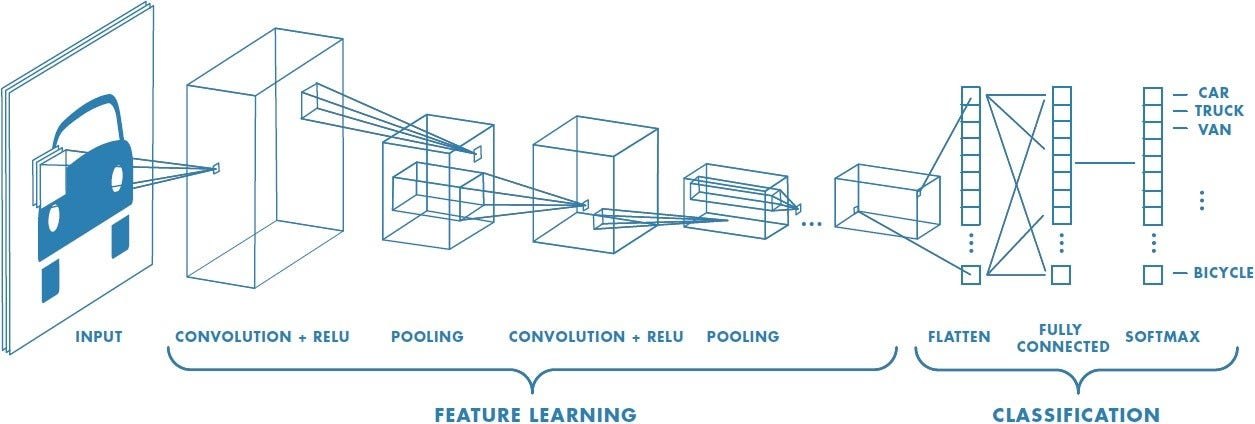

In [ ]:
# Modelo

# Cria o objeto de sequência de camadas
modelo_dsa = models.Sequential()

# Adiciona o primeiro bloco de convolução e max pooling (camada de entrada)
modelo_dsa.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
modelo_dsa.add(layers.MaxPooling2D((2, 2)))

# Adiciona o segundo bloco de convolução e max pooling (camada intermediária)
modelo_dsa.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_dsa.add(layers.MaxPooling2D((2, 2)))

# Adiciona o terceiro bloco de convolução e max pooling (camada intermediária)
modelo_dsa.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_dsa.add(layers.MaxPooling2D((2, 2)))

In [ ]:
# Adicionar camadas de classificação
modelo_dsa.add(layers.Flatten())
modelo_dsa.add(layers.Dense(64, activation = 'relu'))
modelo_dsa.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
# Sumário do modelo
modelo_dsa.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [ ]:
# Compilação do modelo
modelo_dsa.compile(optimizer = 'adam',
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

In [ ]:
%%time
history = modelo_dsa.fit(imagens_treino,
                         labels_treino,
                         epochs = 10,
                         validation_data = (imagens_teste, labels_teste))

### **Avaliação do Modelo**

In [ ]:
# Avalia o modelo
erro_teste, acc_teste = modelo_dsa.evaluate(imagens_teste, labels_teste, verbose = 2)

313/313 - 5s - loss: 1.0494 - accuracy: 0.6332 - 5s/epoch - 15ms/step


In [ ]:
print('\nAcurácia com Dados de Teste:', acc_teste)


Acurácia com Dados de Teste: 0.6331999897956848


### **Deploy do Modelo**

Deploy do modelo é estudado especialmente na <a href="https://www.datascienceacademy.com.br/bundle/formacao-engenheiro-de-machine-learning">Formação Engenheiro de Machine Learning</a>.

In [ ]:
# Carrega uma nova imagem
nova_imagem = Image.open("dados/nova_imagem.jpg")

In [ ]:
# Dimensões da imagem (em pixels)
nova_imagem.size

In [ ]:
# Obtém largura e altura da imagem
largura = nova_imagem.width
altura = nova_imagem.height

In [ ]:
print("A largura da imagem é: ", largura)
print("A altura da imagem é: ", altura)

In [ ]:
# Redimensiona para 32x32 pixels
nova_imagem = nova_imagem.resize((32, 32))

In [ ]:
# Exibir a imagem
plt.figure(figsize = (1,1))
plt.imshow(nova_imagem)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# Converte a imagem para um array NumPy e normaliza
nova_imagem_array = np.array(nova_imagem) / 255.0

In [ ]:
# Expande a dimensão do array para que ele tenha o formato (1, 32, 32, 3)
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0)

In [ ]:
# Previsões
previsoes = modelo_dsa.predict(nova_imagem_array)

In [ ]:
print(previsoes)

In [ ]:
# Obtém a classe com maior probabilidade e o nome da classe
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = nomes_classes[classe_prevista]

In [ ]:
print("A nova imagem foi classificada como:", nome_classe_prevista)